In [1]:
import pandas as pd
import itertools as itt
import ppinetsim
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools as itt
import seaborn as sns

In [2]:
def to_string(x):
    return ''.join(str(x).split('.'))

def load_results(test_method, acceptance_threshold, false_positive_rate, false_negative_rate):
    infix = f'accTh{to_string(acceptance_threshold)}_FPR{to_string(false_positive_rate)}_FNR{to_string(false_negative_rate)}'
    directory = f'output_results/{test_method}/{infix}'
    posteriors = pd.read_csv(f'{directory}/likelihood_{test_method}_{infix}.csv')
    with open(f'{directory}/all_results_{test_method}_{infix}.json') as fp:
        all_results = json.load(fp)
    return posteriors, all_results

In [3]:
def mean_difference_posteriors(posteriors):
    n = posteriors.shape[0]
    all_differences = [posteriors.loc[i, 'Barabasi-Albert'] - posteriors.loc[i, 'Erdos-Renyi'] for i in range(n)]
    return np.mean(all_differences)

In [4]:
def deltas_sods(test_method, acceptance_threshold):
    fprs = fnrs = [0.0,0.1,0.2,0.3,0.4]
    data = {'FPR': [], 'FNR': [], 'delta_sod': []}
    for fpr, fnr in itt.product(fprs, fnrs):
        _, all_results = load_results(test_method, acceptance_threshold, fpr, fnr)
        sod_ba = 0.0
        sod_er = 0.0
        for dist, generator, _ in all_results:
            if generator == 'barabasi-albert':
                sod_ba += dist
            else:
                sod_er += dist
        data['delta_sod'].append((sod_ba - sod_er) / sod_er)
        data['FPR'].append(fpr)
        data['FNR'].append(fnr)
    return pd.DataFrame(data=data)

<AxesSubplot:xlabel='FNR', ylabel='FPR'>

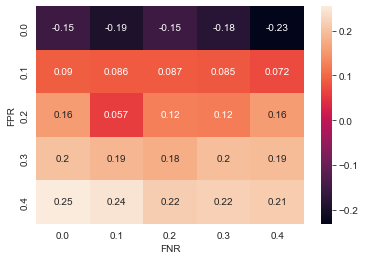

In [5]:
deltas_Y2H = deltas_sods('Y2H', 0.0)
sns.heatmap(deltas_Y2H.pivot('FPR', 'FNR', 'delta_sod'),annot=True)

<AxesSubplot:xlabel='FNR', ylabel='FPR'>

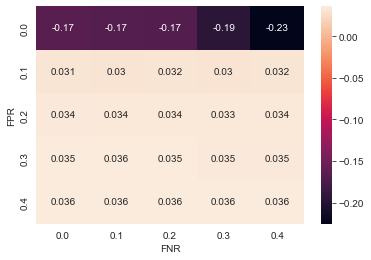

In [6]:
deltas_AP_MS = deltas_sods('AP-MS', 0.0)
sns.heatmap(deltas_AP_MS.pivot('FPR', 'FNR', 'delta_sod'),annot=True)

<AxesSubplot:xlabel='k', ylabel='Estimated posterior'>

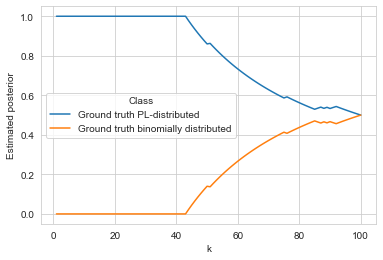

In [13]:
posteriors, _ = load_results('AP-MS', 0.0, 0.0, 0.0)
posteriors.rename(columns={'Erdos-Renyi': 'Ground truth binomially distributed', 'Barabasi-Albert': 'Ground truth PL-distributed'}, inplace=True)
ppinetsim.plot_posteriors(posteriors)

<AxesSubplot:xlabel='k', ylabel='Estimated posterior'>

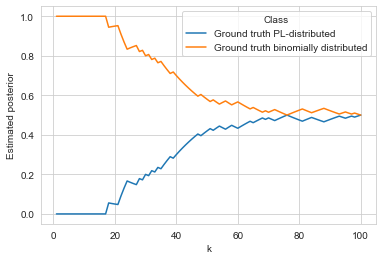

In [15]:
posteriors, _ = load_results('AP-MS', 0.0, 0.1, 0.0)
posteriors.rename(columns={'Erdos-Renyi': 'Ground truth binomially distributed', 'Barabasi-Albert': 'Ground truth PL-distributed'}, inplace=True)
ppinetsim.plot_posteriors(posteriors)